In [82]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [83]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [84]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [85]:
data.shape

(891, 12)

In [86]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

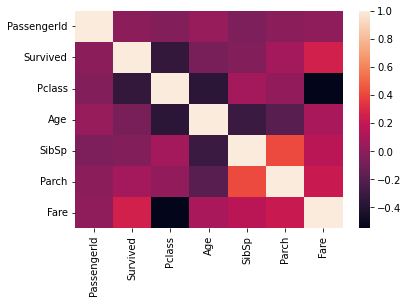

In [89]:
sns.heatmap(data.corr())
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

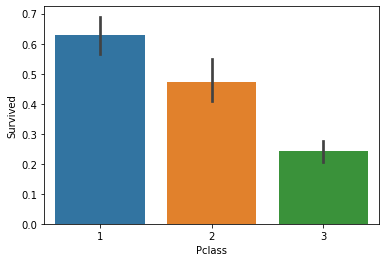

In [93]:
sns.barplot(x='Pclass', y='Survived', data=data)

This plot shows that the chance of survival is high if Pclass=1, whereas for Pclass=3, the chance of Survival is very low.

C:\Users\bipas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female')

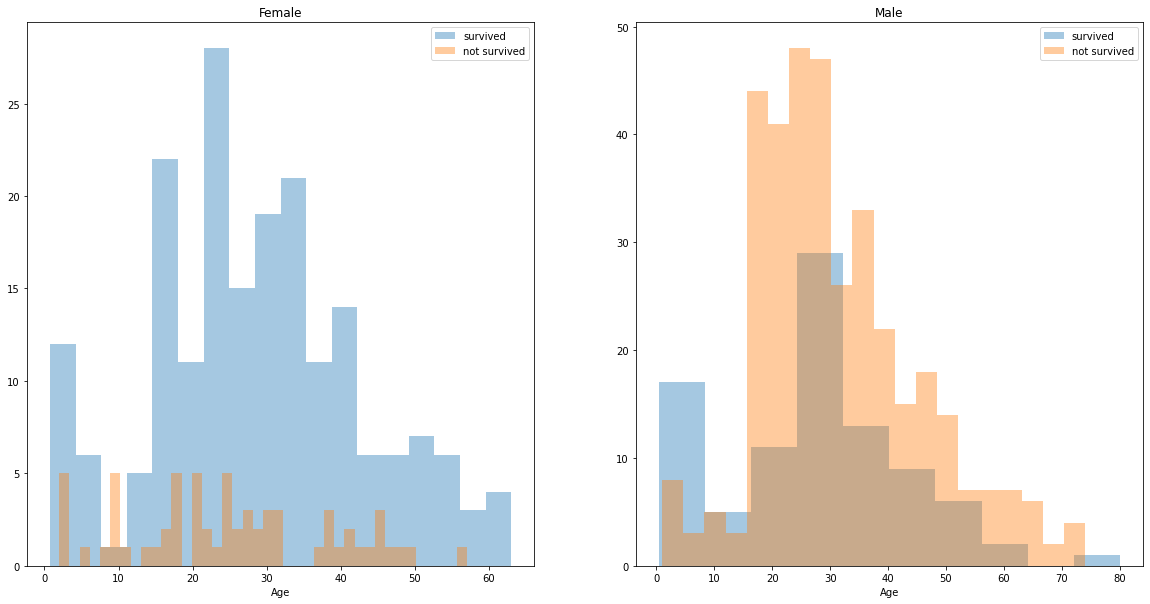

In [90]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
men = data[data['Sex']=='male']
women = data[data['Sex']=='female']
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')


This plot shows that women has a higher chance of survival than men irrespective of Age. The chance of survival is higher for women between Age group 15 to 40. For men it seems to be between 28 to 40. Infanta of bothe sex also have a higher chance of survival.

In [91]:

#for dset in data:
data["relatives"] = data["SibSp"] +data["Parch"]
   
    

<AxesSubplot:xlabel='relatives', ylabel='Survived'>

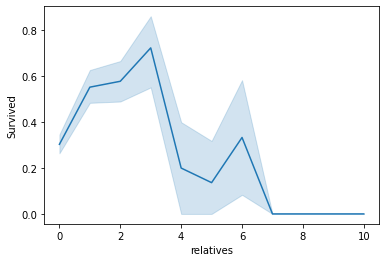

In [92]:
sns.lineplot(x='relatives', y='Survived', data=data)

So passengers with 1 to 3 realitves had a higher chance of survival 

Let us now treat the different columns in the data, first of all we may drop the column passengerId.

In [94]:
data = data.drop(['PassengerId'], axis=1)

In [95]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Let us  also drop this feature as most of the values are missing

In [96]:
data = data.drop(['Cabin'], axis=1)

Let us now treat the missing values in the Age column. I want to create 177 random numbers to fill the missing values, using the mean & standard deviation of the values prsent in the column

In [97]:
for dset in data:
    mean = data["Age"].mean()
    std = data["Age"].std()
    missing = data["Age"].isnull().sum()
   
    rand = np.random.randint(mean-std, mean+std, size = missing)
    

    

data.loc[data['Age'].isnull(), 'Age'] = rand
    
    
data["Age"].isnull().sum()


0

In [98]:
data.tail(20)

Survived  Pclass                                              Name  \
871         1       1  Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872         0       1                          Carlsson, Mr. Frans Olof   
873         0       3                       Vander Cruyssen, Mr. Victor   
874         1       2             Abelson, Mrs. Samuel (Hannah Wizosky)   
875         1       3                  Najib, Miss. Adele Kiamie "Jane"   
876         0       3                     Gustafsson, Mr. Alfred Ossian   
877         0       3                              Petroff, Mr. Nedelio   
878         0       3                                Laleff, Mr. Kristo   
879         1       1     Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
880         1       2      Shelley, Mrs. William (Imanita Parrish Hall)   
881         0       3                                Markun, Mr. Johann   
882         0       3                      Dahlberg, Miss. Gerda Ulrika   
883         0       2                     Banfield, Mr. Frederick James   
884         0       3                            Sutehall, Mr. Henry Jr   
885         0       3              Rice, Mrs. William (Margaret Norton)   
886         0       2                             Montvila, Rev. Juozas   
887         1       1                      Graham, Miss. Margaret Edith   
888         0       3          Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                             Behr, Mr. Karl Howell   
890         0       3                               Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Embarked  relatives  
871  female  47.0      1      1             11751  52.5542        S          2  
872    male  33.0      0      0               695   5.0000        S          0  
873    male  47.0      0      0            345765   9.0000        S          0  
874  female  28.0      1      0         P/PP 3381  24.0000        C          1  
875  female  15.0      0      0              2667   7.2250        C          0  
876    male  20.0      0      0              7534   9.8458        S          0  
877    male  19.0      0      0            349212   7.8958        S          0  
878    male  28.0      0      0            349217   7.8958        S          0  
879  female  56.0      0      1             11767  83.1583        C          1  
880  female  25.0      0      1            230433  26.0000        S          1  
881    male  33.0      0      0            349257   7.8958        S          0  
882  female  22.0      0      0              7552  10.5167        S          0  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000        S          0  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500        S          0  
885  female  39.0      0      5            382652  29.1250        Q          5  
886    male  27.0      0      0            211536  13.0000        S          0  
887  female  19.0      0      0            112053  30.0000        S          0  
888  female  21.0      1      2        W./C. 6607  23.4500        S          3  
889    male  26.0      0      0            111369  30.0000        C          0  
890    male  32.0      0      0            370376   7.7500        Q          0

In [99]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [100]:
data['Embarked'].mode()

0    S
dtype: object

In [101]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()

In [104]:
data['sex'] = le.fit_transform(data['Sex'])

In [105]:
data = data.drop(['Sex'], axis=1)

In [106]:
data = data.drop(['Ticket'], axis=1)

In [107]:
data.describe()


Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.533300    0.523008    0.381594   32.204208   
std      0.486592    0.836071   13.506977    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   37.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

        relatives         sex  
count  891.000000  891.000000  
mean     0.904602    0.647587  
std      1.613459    0.477990  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    1.000000  
max     10.000000    1.000000

In [108]:
data = data.drop(['SibSp'], axis=1)

In [109]:
data = data.drop(['Parch'], axis=1)

In [112]:
data = data.drop(['Name'], axis=1)

In [114]:
data.head()

Survived  Pclass   Age     Fare Embarked  relatives  sex
0         0       3  22.0   7.2500        S          1    1
1         1       1  38.0  71.2833        C          1    0
2         1       3  26.0   7.9250        S          0    0
3         1       1  35.0  53.1000        S          1    0
4         0       3  35.0   8.0500        S          0    1

In [116]:
e={'C':0, 'S':1,'Q':2}
data['Embarked']=data['Embarked'].apply(lambda x:e[x])
data['Embarked'].head()

0    1
1    0
2    1
3    1
4    1
Name: Embarked, dtype: int64

C:\Users\bipas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bipas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bipas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

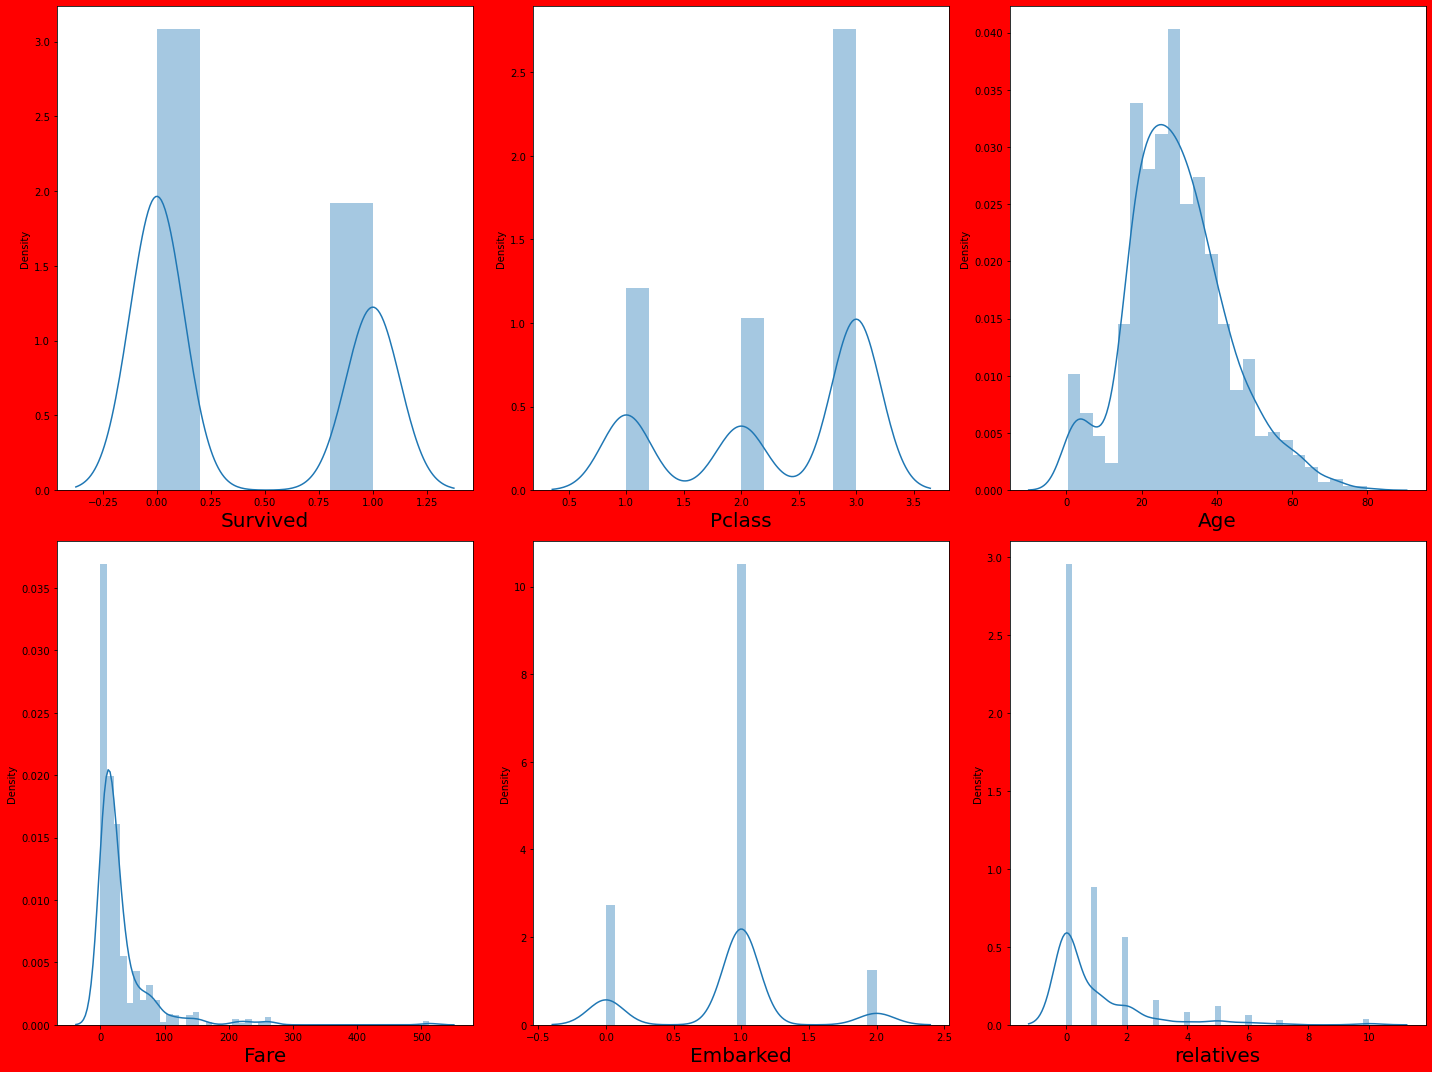

In [117]:
plt.figure(figsize=(20,15), facecolor='red')
plot_number =1

for column in data:
    if plot_number<=6:
        ax=plt.subplot(2,3,plot_number)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number+=1
plt.tight_layout()

# Let us now build the model

In [118]:
X =data.drop(columns='Survived')
y=data['Survived']

In [126]:
data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [127]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test =train_test_split(X, y, test_size=0.3, random_state=7)

In [130]:
Y_train.head()

192    1
191    0
714    0
532    0
132    0
Name: Survived, dtype: int64

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Logistic Regression

In [142]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

lras=accuracy_score(Y_test,Y_pred)*100
lrf1=f1_score(Y_test,Y_pred)
lrrs=recall_score(Y_test,Y_pred)
lrps=precision_score(Y_test,Y_pred)
lras


76.11940298507463

# K-Neighbours Classifier

In [143]:
kn=KNeighborsClassifier()
kn.fit(X_train,Y_train)
Y_pred=kn.predict(X_test)

knas=accuracy_score(Y_test,Y_pred)*100
knf1=f1_score(Y_test,Y_pred)
knrs=recall_score(Y_test,Y_pred)
knps=precision_score(Y_test,Y_pred)
knas

65.67164179104478

# Decision Tree

In [144]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)

dtas=accuracy_score(Y_test,Y_pred)*100
dtf1=f1_score(Y_test,Y_pred)
dtrs=recall_score(Y_test,Y_pred)
dtps=precision_score(Y_test,Y_pred)
dtas

75.0

# Random Forest Classifier

In [145]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

rfas=accuracy_score(Y_test,Y_pred)*100
rff1=f1_score(Y_test,Y_pred)
rfrs=recall_score(Y_test,Y_pred)
rfps=precision_score(Y_test,Y_pred)
rfas

76.49253731343283

# Gaussian Naive Byes

In [146]:
gb=GaussianNB()
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)

gbas=accuracy_score(Y_test,Y_pred)*100
gbf1=f1_score(Y_test,Y_pred)
gbrs=recall_score(Y_test,Y_pred)
gbps=precision_score(Y_test,Y_pred)
gbas

77.98507462686567

In [149]:
df = pd.DataFrame({'Model':['LR', 'KNN', 'DecisionTree', 'RandomForest', 'GaussianNB'], 'Accuracy':[lras,knas,dtas,rfas,gbas],
                   'Recall':[lrrs,knrs,dtrs,rfrs,gbrs], 'Precision':[lrps,knps,dtps,rfps,gbps], 'f1':[lrf1,knf1,dtf1,rff1,gbf1]})
df

Model   Accuracy    Recall  Precision        f1
0            LR  76.119403  0.642857   0.750000  0.692308
1           KNN  65.671642  0.437500   0.628205  0.515789
2  DecisionTree  75.000000  0.625000   0.736842  0.676329
3  RandomForest  76.492537  0.607143   0.781609  0.683417
4    GaussianNB  77.985075  0.669643   0.773196  0.717703

From above table, in our case, GaussianNB is giving us the best performance. Next to it is Random Forest

# Let's plot ROC-AUC curve to choose the best model

On train data

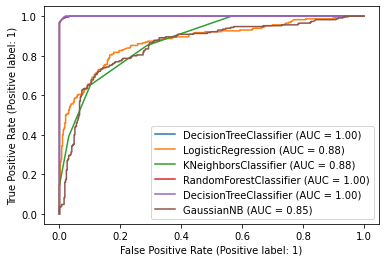

In [150]:
disp = plot_roc_curve(dt, X_train, Y_train)

plot_roc_curve(lr, X_train, Y_train, ax=disp.ax_)

plot_roc_curve(kn, X_train, Y_train, ax=disp.ax_)

plot_roc_curve(rf, X_train, Y_train, ax=disp.ax_)
plot_roc_curve(dt, X_train, Y_train, ax=disp.ax_)
plot_roc_curve(gb, X_train, Y_train, ax=disp.ax_)



plt.legend(prop= {'size':10}, loc='lower right')

plt.show()

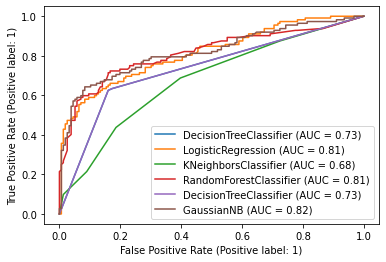

In [151]:
disp = plot_roc_curve(dt, X_test, Y_test)

plot_roc_curve(lr, X_test, Y_test, ax=disp.ax_)

plot_roc_curve(kn, X_test, Y_test, ax=disp.ax_)

plot_roc_curve(rf, X_test, Y_test, ax=disp.ax_)

plot_roc_curve(dt, X_test, Y_test, ax=disp.ax_)

plot_roc_curve(gb, X_test, Y_test, ax=disp.ax_)
plt.legend(prop= {'size':10}, loc='lower right')

plt.show()

From the above two plots again RandomForest outperforms other models

# Hyperparameter Tuning

Let's tune the parameters using GridSearchCV

In [153]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
best_parameters = clf.best_params_
print(best_parameters)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 35, 'n_estimators': 700}


In [154]:
# Best Model with Best parameters
rf= RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 35,   
                                       n_estimators=700, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf.fit(X_train, Y_train)
Y_predict = rf.predict(X_test)

rf.score(X_train, Y_train)

print("oob score:", round(rf.oob_score_, 4)*100, "%")

oob score: 84.59 %


In [159]:
# Predicting with best fit model
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,Y_predict,digits = 2))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       156
           1       0.78      0.62      0.69       112

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268



In [175]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[352,  41],
       [ 55, 175]], dtype=int64)

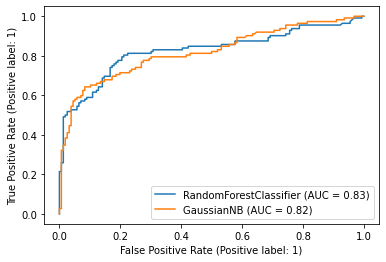

In [183]:
disp = plot_roc_curve(rf, X_test, Y_test)

plot_roc_curve(gb, X_test, Y_test, ax=disp.ax_)
plt.legend(prop= {'size':10}, loc='lower right')

plt.show()